## Preparing the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.genfromtxt('galaxyquasar.csv', delimiter=',',names=True,usecols=(0,1,2,3,4,6),dtype=float,comments='#')

In [3]:
names = data.dtype.names
names

('u', 'g', 'r', 'i', 'z', 'z1')

In [5]:
data=np.genfromtxt('galaxyquasar.csv', delimiter=',',skip_header=1,usecols=(0,1,2,3,4,6),dtype=float)

In [6]:
data

array([[18.97213   , 18.53676   , 18.5828    , 18.34936   , 18.29215   ,
         0.5228189 ],
       [19.24592   , 17.47646   , 16.47817   , 16.04472   , 15.68851   ,
         0.1228459 ],
       [19.43536   , 17.70268   , 16.91565   , 16.58327   , 16.39128   ,
         0.        ],
       ...,
       [18.62718   , 17.30876   , 16.87371   , 16.62399   , 16.42296   ,
         0.05442934],
       [19.5514    , 18.27711   , 17.62101   , 17.21947   , 17.03347   ,
         0.1125709 ],
       [18.80772   , 17.75751   , 17.405     , 17.2165    , 17.12295   ,
         0.04365238]])

In [7]:
d = dict(zip(names, data.T))
d

{'u': array([18.97213, 19.24592, 19.43536, ..., 18.62718, 19.5514 , 18.80772]),
 'g': array([18.53676, 17.47646, 17.70268, ..., 17.30876, 18.27711, 17.75751]),
 'r': array([18.5828 , 16.47817, 16.91565, ..., 16.87371, 17.62101, 17.405  ]),
 'i': array([18.34936, 16.04472, 16.58327, ..., 16.62399, 17.21947, 17.2165 ]),
 'z': array([18.29215, 15.68851, 16.39128, ..., 16.42296, 17.03347, 17.12295]),
 'z1': array([0.5228189 , 0.1228459 , 0.        , ..., 0.05442934, 0.1125709 ,
        0.04365238])}

In [8]:
lab=np.genfromtxt('galaxyquasar.csv', delimiter=',',skip_header=1,usecols=5,dtype=str)
lab

array(['QSO', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype='<U6')

In [9]:
set(lab)

{'GALAXY', 'QSO'}

In [10]:
for diff in ['ug', 'gr', 'ri', 'iz']:
    d[diff]=d[diff[0]]-d[diff[1]] 
d['lab']=lab

In [11]:
d.keys()

dict_keys(['u', 'g', 'r', 'i', 'z', 'z1', 'ug', 'gr', 'ri', 'iz', 'lab'])

In [13]:
X=np.array([d['ug'], d['gr'], d['ri'], d['iz']]).T
y = np.array(lab=='QSO',dtype=int)

## Analysis

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [121]:
class_names = lab
print(class_names)

['QSO' 'GALAXY' 'GALAXY' ... 'GALAXY' 'GALAXY' 'GALAXY']


In [122]:
print(len(X_train))
print(X_train.shape)
print(X_test.shape)

35000
(35000, 4)
(15000, 4)


In [123]:
from tensorflow import keras

model = keras.Sequential([
            keras.layers.InputLayer(input_shape=np.shape(X_train[1])),
            # Hidden layers
            keras.layers.Dense(8,  activation='relu'),
            keras.layers.Dense(4,  activation='relu'),
            # Output layer, do not change
            keras.layers.Dense(1, activation='sigmoid')])

Wanted learning rate, $\eta = 0.001$

In [124]:
model.compile(
            # Optimization algorithm, specify learning rate
            optimizer=keras.optimizers.Adam(learning_rate=1e-3),
            # Loss function for a binary classifier
            loss='binary_crossentropy',
            # Diagnostic quantities
            metrics=['accuracy'])

In [125]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'])

clf = model.fit(X_train, y_train, epochs=1)

1094/1094 [==============================] - 1s 683us/step - loss: 0.2365 - accuracy: 0.8856


In [126]:
model.evaluate(X_test, y_test)

469/469 [==============================] - 0s 556us/step - loss: 0.0963 - accuracy: 0.9795


[0.09630680829286575, 0.9794666767120361]

In [127]:
y_proba = model.predict(X_test).round(2)
print(y_proba)

469/469 [==============================] - 0s 442us/step
[[0.02]
 [0.01]
 [0.81]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


In [128]:
y_pred = np.array(np.squeeze(y_proba)>0.5).astype(int)
pred_names = np.array(class_names)[y_pred]
print(pred_names)

['QSO' 'QSO' 'GALAXY' ... 'QSO' 'QSO' 'QSO']


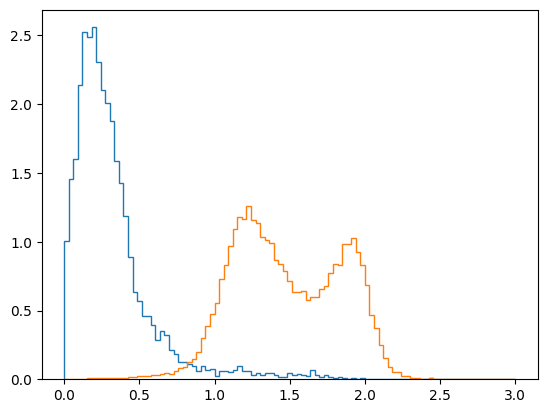

In [129]:
plt.hist(d['ug'][lab=='QSO'],histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(d['ug'][lab=='GALAXY'],histtype='step',bins=np.linspace(0,3,100),density=True);

In [133]:
qso_data = X_test[:,0][pred_names=='GALAXY']
print(qso_data)

[0.28725 0.07073 0.05875 ... 0.28883 0.38083 0.11429]


In [134]:
gal_data = X_test[:,0][pred_names=='QSO']
print(gal_data)

[1.17384 1.5603  1.22792 ... 1.86697 1.87909 1.78075]


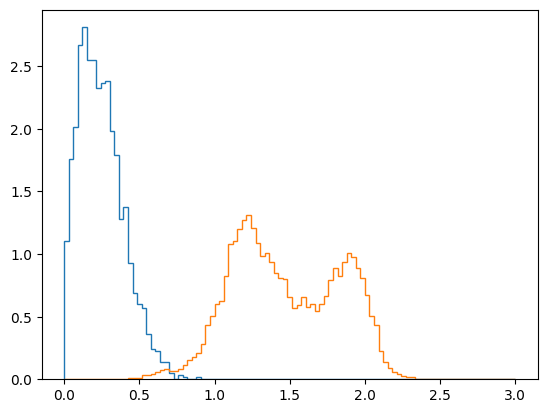

In [136]:
plt.hist(qso_data,histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(gal_data,histtype='step',bins=np.linspace(0,3,100),density=True);

1563/1563 [==============================] - 1s 506us/step
['GALAXY' 'QSO' 'QSO' ... 'QSO' 'QSO' 'QSO']


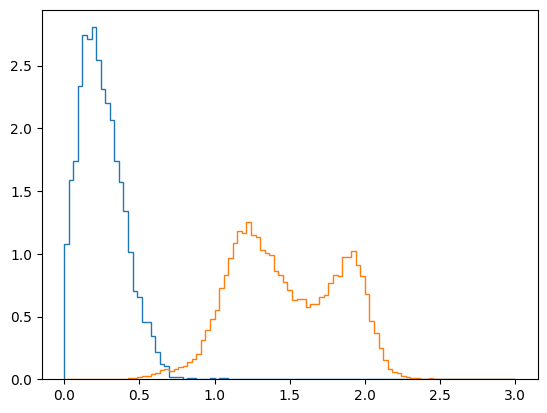

In [138]:
y_proba = model.predict(X).round(2)

y_pred = np.array(np.squeeze(y_proba)>0.5).astype(int)
pred_names = np.array(class_names)[y_pred]
print(pred_names)


qso_data_1 = X[:,0][pred_names=='GALAXY']
gal_data_1 = X[:,0][pred_names=='QSO']

plt.hist(qso_data_1,histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(gal_data_1,histtype='step',bins=np.linspace(0,3,100),density=True);

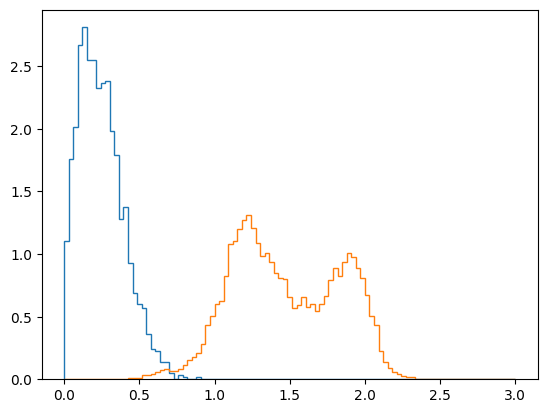

In [139]:
plt.hist(qso_data,histtype='step',bins=np.linspace(0,3,100),density=True)
plt.hist(gal_data,histtype='step',bins=np.linspace(0,3,100),density=True);